<a href="https://colab.research.google.com/github/Mehranmollanorozi/SVM/blob/main/SVM_Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
columns = [
    'Age', 'Workclass', 'Flnwgt', 'Education', 'Education-num', 'Marital-status',
    'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss',
    'Hours-per-week', 'Native-country', 'Income'
]

In [ ]:
data = pd.read_csv('adult.data', names=columns, sep=',\s', engine='python')
test_data = pd.read_csv('adult.test', names=columns, sep=',\s', engine='python', skiprows=1)

In [ ]:
data['Income'] = data['Income'].apply(lambda x: 1 if x == '>50K' else 0)
test_data['Income'] = test_data['Income'].apply(lambda x: 1 if x == '>50K.' else 0)

In [ ]:
categorical_columns = ['Workclass', 'Education', 'Marital-status', 'Occupation',
                       'Relationship', 'Race', 'Sex', 'Native-country']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

In [ ]:
missing_cols = set(data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[data.columns]

In [ ]:
X_train = data.drop('Income', axis=1)
y_train = data['Income']

X_test = test_data.drop('Income', axis=1)
y_test = test_data['Income']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM model: {accuracy * 100:.2f}%")

Accuracy of SVM model: 85.26%


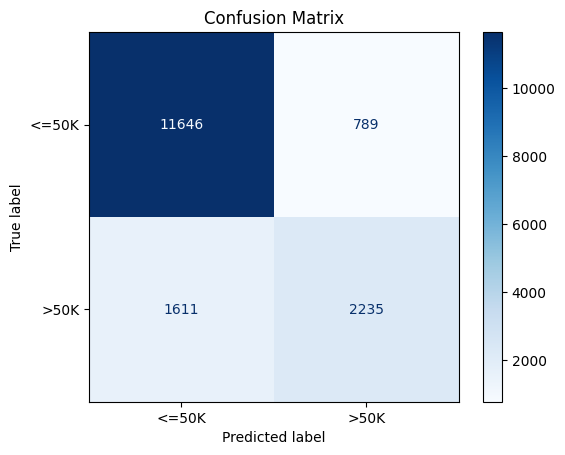

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['<=50K', '>50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()